# T-SNE (T-Distributed stochastic neighbour embedding)

## TSNE

T-SNE is a dimensionality reduction technique, which can  also be used for visualization. 

Unlike a PCA, it can do non-linear dimensionality reduction and tries to capture the local structure and the global structure in the low-dimensional space

In a lot of ways , it is similar philosophically to UMAP, but there are differences as well. The basic philosophy is similar to UMAP, find similarities between all pairs of points in high dimensions, and ensure that the similarities in lower dimensions are similar to the high dimensions, but the details differ

## The details

The goal of T-SNE is to reduce dimensionality From K dimensions to a lower dimensions for better visualization

For example, the plot below shows how 2 dimensions are reduced to 1 using T-SNE
While a PCA being a linear dim-reduction algorithm cannot separate these clusters easily in lower dimensions, a T-SNE can

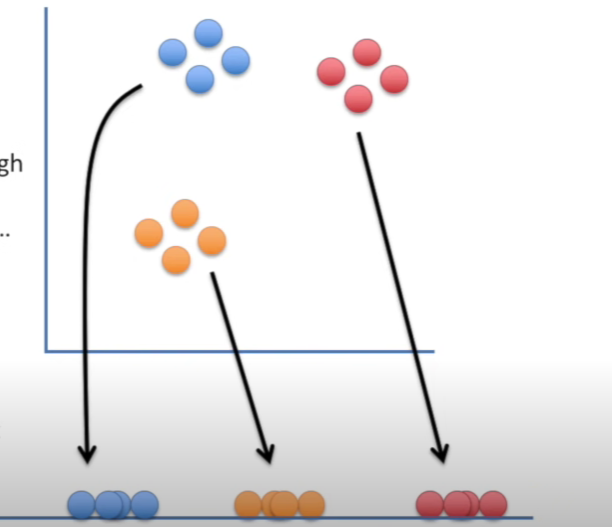


1) Step 1 in T-SNE is to compute pairwise similarities in the original high dimensional space. Unlike UMAP , which uses an exponential way to compute pairwise similarities, T-SNE uses a gaussian assumption. Let's say we pick point A and want to compute pairwise similarities of all points with respect to A.
The way to do this is the compute the raw distance AB from A to B, for example, assume a gaussian centered on A with a certain standard deviation (how is this standard deviation determined ? ), and read off the density of the guassian at distance AB from A

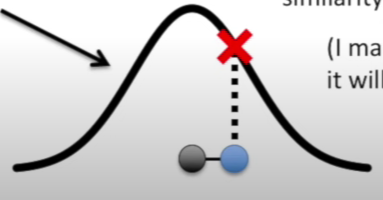

2) Do this for every point apart from A (So you have N-1 similarities, AB, AC, AD....) Ignore AA (The similarity of a point with itself, set to 0 in TSNE, even though it should technically have the highest value). Now we want to scale these N-1 similarities, such that the sum is 1 (Why do we need to scale these similaries so they add up to 1 ? This is to factor out the local density of points, related to the perplexity parameter)

3) Pick each of the other points and repeat steps 1 and 2. You will get a N * N matrix with all similarity scores. However, this is still asymmetrical, as the way the gaussian is defined, AB (Gaussian centered on A, similarity of A with B) and BA ( Gaussian centered on B, similarity of B with A) need not be the same. So make this matrix a symmetric matrix, by replacing AB and BA with 0.5(AB+BA)

The diagonals (a similarity of point with itself) is set to 0


Now we are done with the high dimensional space, and want to go to the low dimension space


4) First , initialize all N points randomly in the low dimensional space. Compute similar pairwise similarities between all pairs of points in the low dimension, the only difference is that a T-Distribution is used in low dimension unlike a gaussian in higher dimension)

The matrix of similarities will in general be very different from the high dimension as the low d is randomly initialized. Our goal is now to shift all points in low dimensions such that the similarity matrix matches the high dimension. This is done using gradient descent.


## Caveats

Schools of thought exist that T-SNE can be used only for visualization and not for downstream clustering after reducining dimensions https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne, the reason being that depending on the perplexity value of T-SNE, T-SNE can create fake patterns in lower dimensions, and it is hard to say if patterns in lower dimensions are real (coming from data) or fake (coming from T-SNE)


## References

1) The original paper https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
2) Statquest has an awesome explanation, as always https://www.youtube.com/watch?v=NEaUSP4YerM